# OpenML CC18 Metalearning Benchmark

In [1]:
%matplotlib inline

In [15]:
import pandas as pd
import pandera as pa
import plotly.express as px

## Load Data

In [114]:
JOB = 317


check_betw_zero_one = pa.Check(lambda s: (0.0 <= s) & (s <= 1.0))

INFERENCE_RESULT_SCHEMA = pa.DataFrameSchema(
    columns={
        "data_env": pa.Column(pa.String),
        "n_inference_steps": pa.Column(pa.Int),
        "is_valid": pa.Column(pa.Bool),
        "reward": pa.Column(pa.Float),
        "validation_score": pa.Column(pa.Float),
    },
    coerce=True,
)

@pa.check_output(INFERENCE_RESULT_SCHEMA)
def data_to_longform(inference_results):
    return (
        inference_results
        [["data_env", "n_inference_steps", "key", "value"]]
        .dropna(subset=["value"])
        .pivot_table(
            index=["data_env", "n_inference_steps"],
            columns="key",
            values="value",
            aggfunc=lambda x: x,
        )
        .reset_index()
        .dropna()
        # all scores should be strings
        .loc[
            lambda df: (
                df.validation_score.map(lambda x: isinstance(x, str)) &
                df.mlf_description.map(lambda x: isinstance(x, str)) &
                df.reward.map(lambda x: isinstance(x, str)) &
                df.is_valid.map(lambda x: isinstance(x, str))
            )
        ]
        .rename_axis(None, axis=1)
        .reset_index(drop=True)
    )

In [115]:
inference_results = pd.concat([
    (
        pd.read_csv(f"../floyd_outputs/{JOB}/{env}_env_inference_results.csv")
        .pipe(data_to_longform)
        .assign(data_env_partition=env)
    ) for env in ["training", "test"]
])
inference_results.head()

,data_env,n_inference_steps,is_valid,mlf_description,reward,validation_score,data_env_partition
0,openml.2dplanes,0,True,{'SimpleImputer': ColumnTransformer(n_jobs=Non...,0.984551,0.984551,training
1,openml.2dplanes,1,True,{'SimpleImputer': ColumnTransformer(n_jobs=Non...,0.984789,0.984789,training
2,openml.2dplanes,2,True,{'SimpleImputer': ColumnTransformer(n_jobs=Non...,0.985275,0.985275,training
3,openml.2dplanes,3,True,{'SimpleImputer': ColumnTransformer(n_jobs=Non...,0.983489,0.983489,training
4,openml.2dplanes,4,True,{'SimpleImputer': ColumnTransformer(n_jobs=Non...,0.985837,0.985837,training


## Plot Rewards

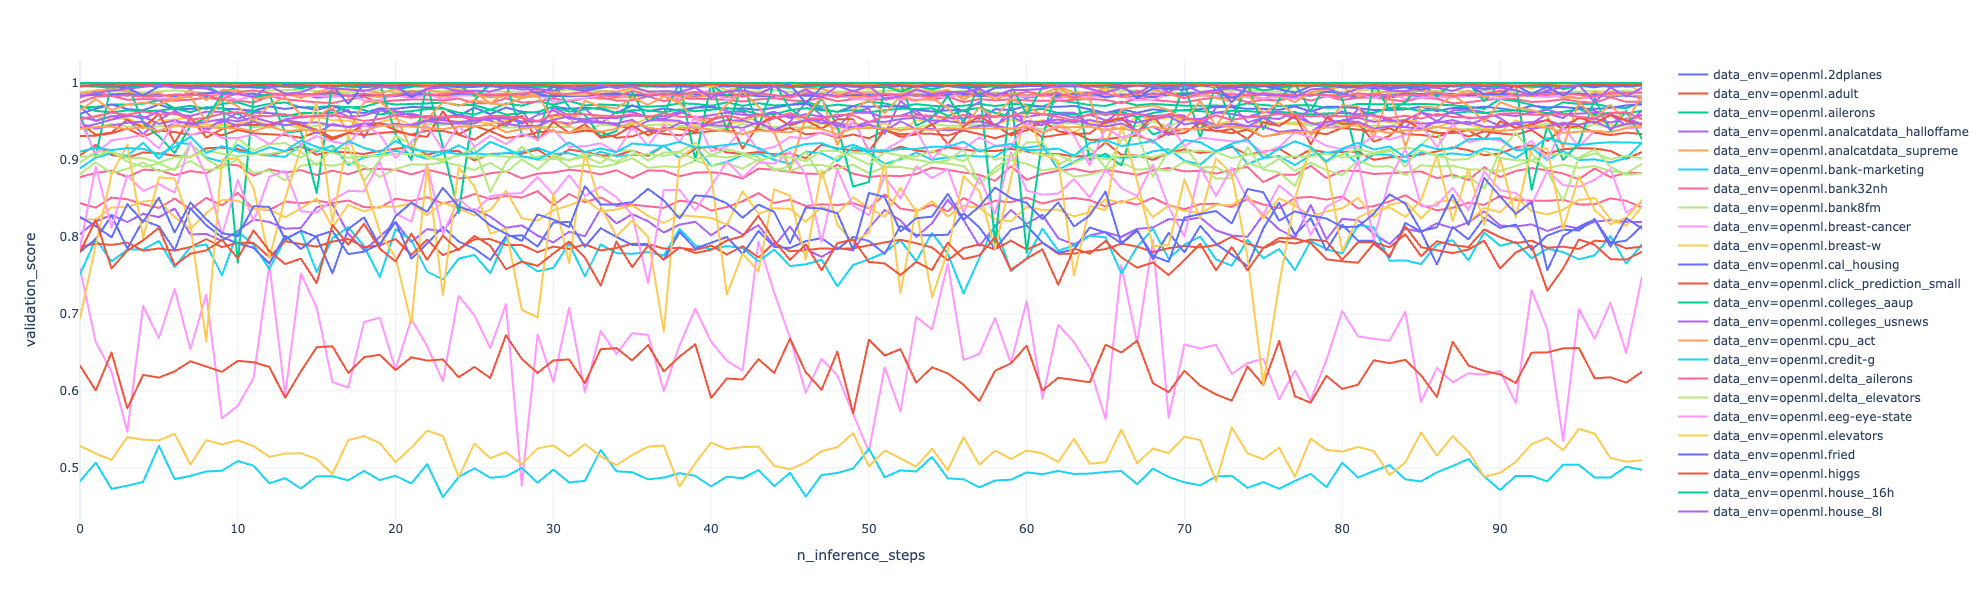

In [116]:
px.line(
    inference_results.query("data_env_partition == 'training'"),
    x="n_inference_steps",
    y="validation_score",
    template="plotly_white",
    color="data_env",
)

### Plot of Test Data Environment Validation Scores

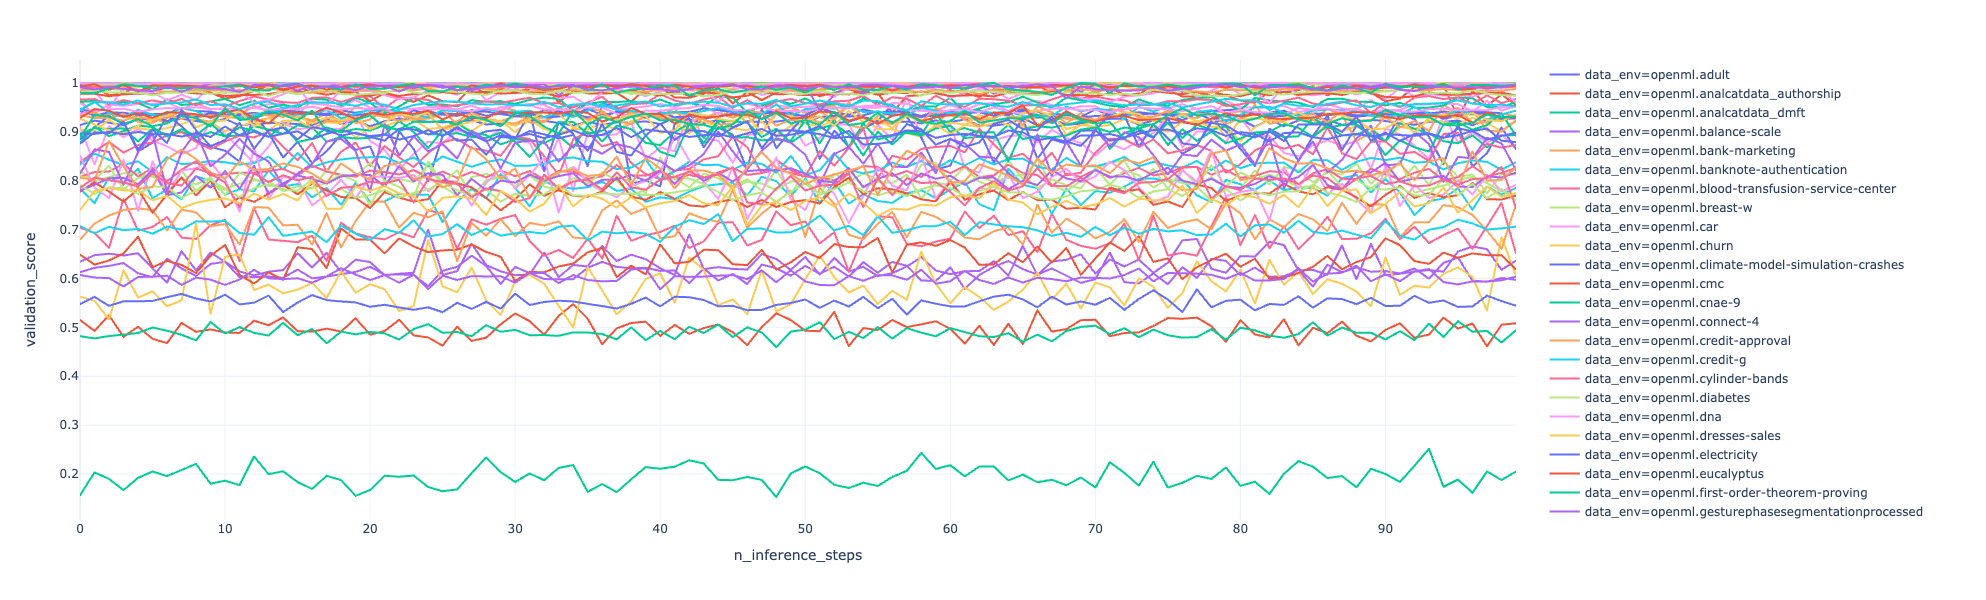

In [117]:
px.line(
    inference_results.query("data_env_partition == 'test'"),
    x="n_inference_steps",
    y="validation_score",
    template="plotly_white",
    color="data_env",
)

In [118]:
with pd.option_context("display.max_rows", 200):
    display(
        inference_results
        .groupby(["data_env_partition", "data_env"])
        .apply(lambda df: df.loc[df.validation_score.idxmax()])
        .reset_index(drop=True)
        .groupby("data_env_partition")
        .apply(lambda df: df.sort_values("validation_score"))
    )

data_env  \
data_env_partition                                                      
test               2                          openml.analcatdata_dmft   
                   22              openml.first-order-theorem-proving   
                   11                                      openml.cmc   
                   40                              openml.numerai28.6   
                   23        openml.gesturephasesegmentationprocessed   
                   13                                openml.connect-4   
                   3                             openml.balance-scale   
                   21                               openml.eucalyptus   
                   19                            openml.dresses-sales   
                   35                      openml.mfeat-morphological   
                   6          openml.blood-transfusion-service-center   
                   24                                     openml.ilpd   
                   59                                  openml.vehicle   
                   37                            openml.mfeat-zernike   
                   31                                  openml.madelon   
                   15                                 openml.credit-g   
                   56                       openml.steel-plates-fault   
                   33                            openml.mfeat-fourier   
                   26   openml.jungle_chess_2pcs_raw_endgame_complete   
                   27                                      openml.kc1   
                   17                                 openml.diabetes   
                   25                                      openml.jm1   
                   44                                      openml.pc3   
                   28                                      openml.kc2   
                   16                           openml.cylinder-bands   
                   50                                 openml.satimage   
                   43                                      openml.pc1   
                   12                                   openml.cnae-9   
                   0                                     openml.adult   
                   42                          openml.ozone-level-8hr   
                   4                            openml.bank-marketing   
                   49                              openml.qsar-biodeg   
                   60                                    openml.vowel   
                   20                              openml.electricity   
                   52                                  openml.semeion   
                   30                                   openml.letter   
                   9                                     openml.churn   
                   51                                  openml.segment   
                   48                                  openml.phoneme   
                   10         openml.climate-model-simulation-crashes   
                   34                           openml.mfeat-karhunen   
                   45                                      openml.pc4   
                   18                                      openml.dna   
                   55                                   openml.splice   
                   14                          openml.credit-approval   
                   32                            openml.mfeat-factors   
                   8                                       openml.car   
                   36                              openml.mfeat-pixel   
                   41                                openml.optdigits   
                   57                                  openml.texture   
                   54                                 openml.spambase   
                   39                                    openml.nomao   
                   46                                openml.pendigits   
                   38                         